In [1]:
import torch

from reggae.data_loaders.datasets import P53Data
from reggae.gp.variational import SingleLinearLFM, TranscriptionalTrainer
from reggae.utilities import save, load
from reggae.plot.variational_plotters import Plotter

from matplotlib import pyplot as plt
import numpy as np

f64 = np.float64


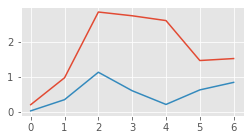

In [2]:
dataset = P53Data()

num_genes = 5

num_tfs = 1

t_inducing = torch.linspace(0, 1, 7, dtype=torch.float64).reshape((-1, 1))
t_observed = torch.linspace(0, 1, 7).view(-1)

m_observed = torch.stack([
    dataset[i][1] for i in range(num_genes*3)
]).view(5, 3, 7).transpose(0, 1)

plt.figure(figsize=(4, 2))
plt.plot(dataset[0][1])
plt.plot(m_observed[1, 2])

In [3]:
#ExponentialLFM
model = SingleLinearLFM(num_genes*3, num_tfs,
                        t_inducing, dataset, extra_points=0,
                        fixed_variance=dataset.variance, learn_inducing=False, num_samples=15)
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
trainer = TranscriptionalTrainer(model, optimizer, dataset, batch_size=15)

C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models\model.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = Parameter(torch.tensor(t_inducing), requires_grad=learn_inducing)


### Outputs prior to training:

C:\Users\Jacob\Documents\proj\reggae\reggae\plot\variational_plotters.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


torch.Size([3, 5, 7])


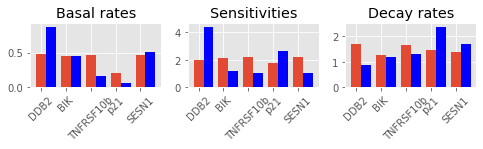

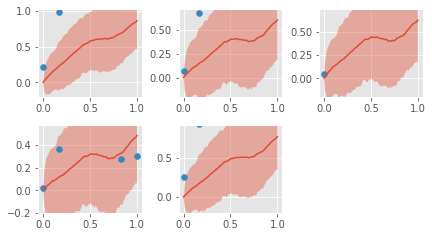

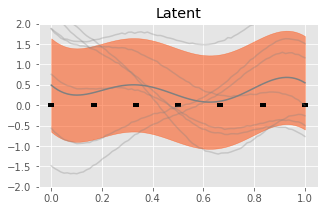

In [4]:
print(m_observed.shape)
plotter = Plotter(model, dataset.gene_names)

t_predict = torch.linspace(f64(0), f64(1), 80, dtype=torch.float64)

rtol = 1e-3
atol = rtol/10

model_kwargs = {
    'rtol': rtol, 'atol': atol
}

plotter.plot_kinetics()
plotter.plot_outputs(t_predict, replicate=0, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict)

Epoch 101/300 - Loss: 545.25 (540.02 5.23) λ: 0.051 b: 1.16 d 2.05 s: 2.47
Epoch 121/300 - Loss: 811.21 (807.03 4.18) λ: 0.041 b: 1.21 d 2.02 s: 2.56
Epoch 141/300 - Loss: 737.54 (732.92 4.62) λ: 0.036 b: 1.29 d 1.94 s: 2.70
Epoch 161/300 - Loss: 954.88 (950.31 4.58) λ: 0.030 b: 1.23 d 2.01 s: 2.71
Epoch 181/300 - Loss: 978.50 (973.87 4.63) λ: 0.027 b: 1.32 d 1.91 s: 2.86
Epoch 201/300 - Loss: 567.64 (562.51 5.13) λ: 0.023 b: 1.06 d 2.18 s: 2.75
Epoch 221/300 - Loss: 579.22 (573.74 5.48) λ: 0.023 b: 0.93 d 2.33 s: 2.66
Epoch 241/300 - Loss: 865.80 (861.03 4.78) λ: 0.021 b: 0.95 d 2.31 s: 2.69
Epoch 261/300 - Loss: 785.35 (779.98 5.37) λ: 0.022 b: 1.11 d 2.16 s: 2.83
Epoch 281/300 - Loss: 686.62 (681.88 4.74) λ: 0.020 b: 1.28 d 1.98 s: 2.99
319.87310552597046


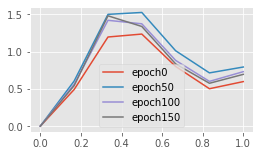

In [8]:
tol = 5e-3
import time
start = time.time()

output = trainer.train(200, rtol=tol, atol=tol/10,
                       report_interval=20, plot_interval=50)
end = time.time()
print(end - start)


### Outputs after training

C:\Users\Jacob\Documents\proj\reggae\reggae\plot\variational_plotters.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


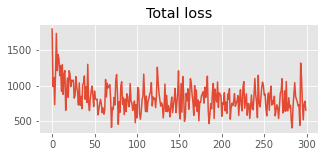

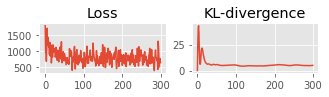

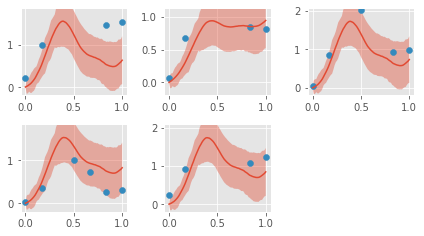

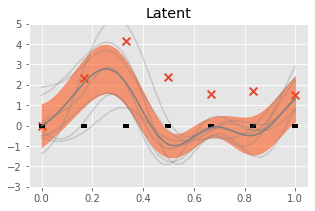

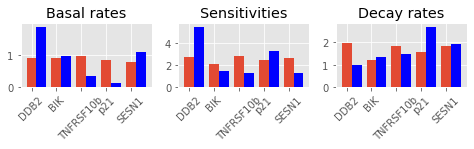

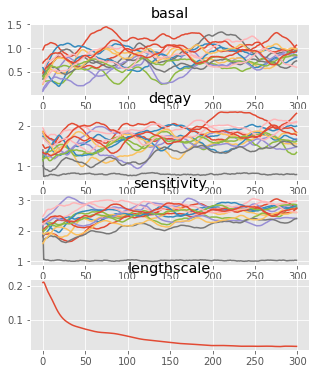

In [10]:
plotter.plot_losses(trainer, last_x=1001)
plotter.plot_outputs(t_predict, replicate=0, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict, ylim=(-3, 5), plot_barenco=True, plot_inducing=False)
plotter.plot_kinetics()
plotter.plot_convergence(trainer)

In [7]:
save(model, 'variational_linear')

In [8]:
do_load = False
if do_load:
    model = load('variational_linear', SingleLinearLFM, num_genes, num_tfs,
                 t_inducing, dataset, extra_points=2, fixed_variance=dataset.variance)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    trainer = TranscriptionalTrainer(model, optimizer, dataset)
print(do_load)

False
